## Assignment part1: Image Processing with *OpenCV*

---



In this assignment, you will perform the following tasks using OpenCV:

1. **Sharpen the Image:** Apply a sharpening filter to enhance the details in the image.
2. **Edge Detection with Sobel Operator:** Use the Sobel operator to detect edges in the image.
3. **Color Isolation:** Display only the red and brown regions of the image in color, while converting all other regions to grayscale.

### Instructions:

- **Sharpening the Image:**
  - Research how to create and apply a sharpening kernel using OpenCV's `cv2.filter2D` function.
  - Apply this kernel to the original image to produce a sharpened version.

- **Edge Detection with Sobel Operator:**
  - Convert the image to grayscale.
  - Apply the Sobel operator to detect edges in both the x and y directions.
  - Combine these gradients to visualize the edges in the image.

- **Color Isolation:**
  - Convert the image to the HSV color space to facilitate color detection.
  - Create masks to isolate red and brown colors. You may need to define appropriate HSV ranges for these colors.
  - Convert regions not corresponding to these masks to grayscale, while retaining the color in the red and brown regions.


Good luck, and enjoy experimenting with image processing techniques!


## Solution:

### 1. Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### 2. Define functions

#### I. Load Image

In [ ]:
def load_image(path='/content/bear.png'):
    """Load an image from the specified path."""
    image = cv2.imread(path)
    if image is None:
        raise ValueError(f"Could not load image from {path}")
    return image

#### II. Sharpen image using openCV

In [ ]:
def sharpen_image(image):
    """
    Apply a sharpening filter to enhance image details.

    This uses a kernel that enhances edges by subtracting a blurred version
    from the original image.
    """
    # Define sharpening kernel
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])

    # Apply the kernel to sharpen the image
    sharpened = cv2.filter2D(image, -1, kernel)

    return sharpened

#### III. Edge detection using sobel

In [ ]:
def detect_edges_sobel(image):
    """
    Detect edges in the image using the Sobel operator.

    Returns both the gradient in x and y directions and the combined gradient magnitude.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel operator in x and y directions
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Normalize to 0-255 and convert to uint8
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Normalize Sobel results for visualization
    abs_sobelx = cv2.convertScaleAbs(sobelx)
    abs_sobely = cv2.convertScaleAbs(sobely)

    return abs_sobelx, abs_sobely, gradient_magnitude

#### IV. Isolate Colors

In [ ]:
def isolate_colors(image):
    """
    Isolate red and brown regions in the image, converting all other regions to grayscale.
    """
    # Convert to HSV color space for better color isolation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define ranges for red (need two ranges as red wraps around the hue circle)
    # Lower red range (0-10)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])

    # Upper red range (160-180)
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Define range for brown
    # Brown is usually a dark shade of orange or red
    lower_brown = np.array([10, 100, 20])
    upper_brown = np.array([30, 255, 200])

    # Create masks
    red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

    # Combine the red masks
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)

    # Combine red and brown masks
    combined_mask = cv2.bitwise_or(red_mask, brown_mask)

    # Create a grayscale version of the original image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Use the mask to create the result
    # The mask determines where we keep the color (masked area) and where we use grayscale (unmasked area)
    masked_img = cv2.bitwise_and(image, image, mask=combined_mask)
    inverse_mask = cv2.bitwise_not(combined_mask)
    grayscale_areas = cv2.bitwise_and(gray_bgr, gray_bgr, mask=inverse_mask)

    # Combine the color and grayscale parts
    result = cv2.add(masked_img, grayscale_areas)

    return result, red_mask, brown_mask, combined_mask

#### V. Proccing the image:

In [ ]:
def process_image(image_path='input_image.jpg'):
    """
    Process an image according to the assignment requirements:
    1. Sharpen the image
    2. Detect edges with Sobel
    3. Isolate red and brown colors
    """
    # Load the image
    original = load_image(image_path)

    # 1. Sharpen the image
    sharpened = sharpen_image(original)

    # 2. Edge detection with Sobel
    sobel_x, sobel_y, sobel_combined = detect_edges_sobel(original)

    # 3. Color isolation (red and brown)
    color_isolated, red_mask, brown_mask, combined_mask = isolate_colors(original)

    # Display results
    plt.figure(figsize=(15, 10))

    # First row
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
    plt.title('Sharpened Image')

    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(color_isolated, cv2.COLOR_BGR2RGB))
    plt.title('Color Isolation (Red & Brown)')

    # Second row
    plt.subplot(2, 3, 4)
    plt.imshow(sobel_x, cmap='gray')
    plt.title('Sobel X (Horizontal Edges)')

    plt.subplot(2, 3, 5)
    plt.imshow(sobel_y, cmap='gray')
    plt.title('Sobel Y (Vertical Edges)')

    plt.subplot(2, 3, 6)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Sobel Combined (Gradient Magnitude)')

    plt.tight_layout()
    plt.show()

    # Additional visualization for masks (optional)
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(red_mask, cmap='gray')
    plt.title('Red Mask')

    plt.subplot(1, 3, 2)
    plt.imshow(brown_mask, cmap='gray')
    plt.title('Brown Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(combined_mask, cmap='gray')
    plt.title('Combined Mask (Red & Brown)')

    plt.tight_layout()
    plt.show()

    return {
        'original': original,
        'sharpened': sharpened,
        'sobel_x': sobel_x,
        'sobel_y': sobel_y,
        'sobel_combined': sobel_combined,
        'color_isolated': color_isolated
    }

#### VI. Execute the pipeline

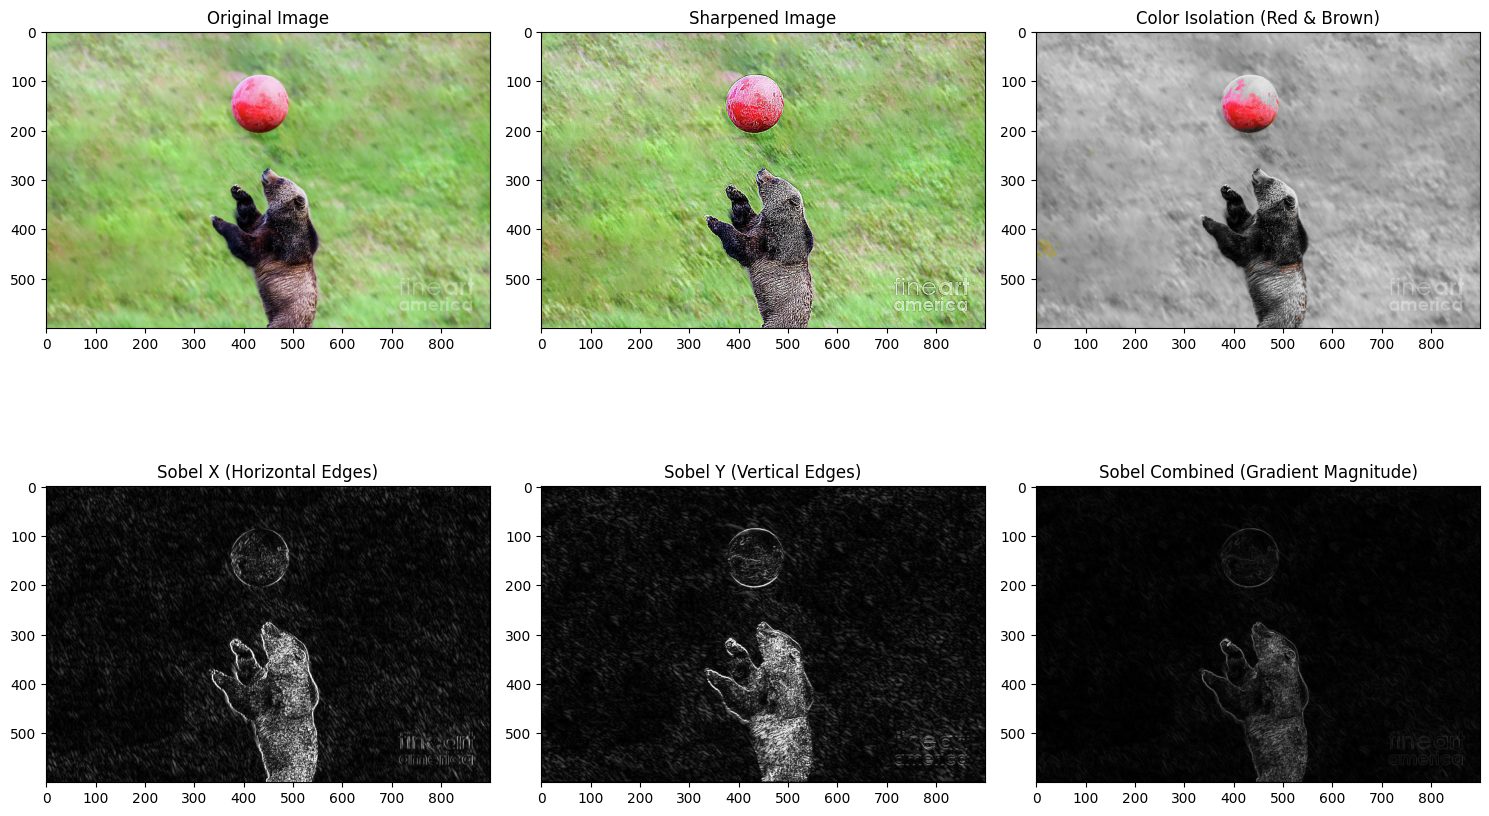

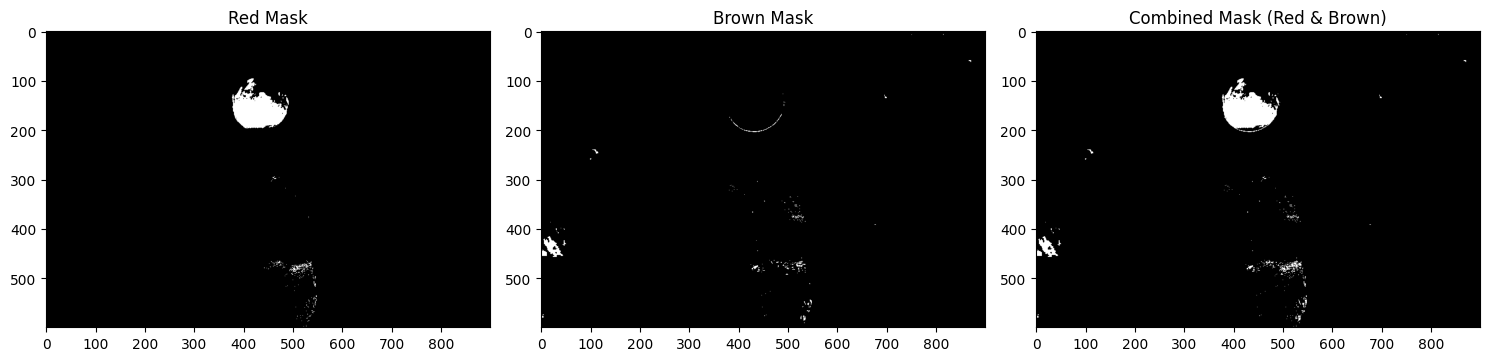

Image processing completed successfully!


In [ ]:
# Execute the image processing pipeline
if __name__ == "__main__":
    try:
        # Replace 'input_image.jpg' with the actual image path in the Colab environment
        results = process_image('bear.jpg')
        print("Image processing completed successfully!")
    except Exception as e:
        print(f"Error: {e}")